In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# pivot table just gives us grouping and aggregate functionality easily without using groupby statement
# tips is a toy dataset in seaborn
df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [3]:
# let's say i want to find the average bill done by male and female
df.groupby('sex')['total_bill'].mean()

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\3871041370.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [4]:
# if we want to do that by based on both gender and smoker also
df.groupby(['sex', 'smoker'])[['total_bill']].mean()

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\3995464777.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'smoker'])[['total_bill']].mean()


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [5]:
# the above can be done multicolumned also like this
df.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\447541821.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [6]:
# pivot tables will be exactly like above, the same can be done like this
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill')

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\1470561844.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'tip')

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\2103467723.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex', columns = 'smoker', values = 'tip')


smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [8]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum')

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\1100878217.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [9]:
# we can even do for multiple columns and multiple indexes also
df.pivot_table(index = 'sex', columns = ['smoker', 'day'], values = 'total_bill', aggfunc = 'sum')

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\476566785.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex', columns = ['smoker', 'day'], values = 'total_bill', aggfunc = 'sum')


smoker     Yes                              No                       
day       Thur     Fri     Sat     Sun    Thur    Fri     Sat     Sun
sex                                                                  
Male    191.71  163.62  589.62  392.12  369.73  34.95  637.73  877.34
Female  134.53   88.58  304.00   66.16  400.36  38.73  247.05  291.54

In [10]:
df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ['total_bill', 'tip', 'size'], aggfunc = {'total_bill': 'mean', 'tip' : 'sum', 'size' : 'count'})

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\334549533.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ['total_bill', 'tip', 'size'], aggfunc = {'total_bill': 'mean', 'tip' : 'sum', 'size' : 'count'})


size                                                  tip  \
day            Thur          Fri          Sat          Sun          Thur   
time          Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       10      0     3      5     0     27     0     15  30.58   
       No        20      0     0      2     0     32     0     43  58.83   
Female Yes        7      0     3      4     0     15     0      4  20.93   
       No        24      1     1      1     0     13     0     14  58.49   

                      ...                             total_bill         \
day                   ...   Sat           Sun               Thur          
time          Dinner  ... Lunch  Dinner Lunch  Dinner      Lunch Dinner   
sex    smoker         ...                                                 
Male   Yes       0.0  ...   0.0   77.74   0.0   52.82  19.171000    NaN   
       No        0.0  ...   0.0  104.21   0.0  133.96  18.486500    NaN   
Female Yes       0.0  ...   0.0   43.03   0.0   14.00  19.218571    NaN   
       No        3.0  ...   0.0   35.42   0.0   46.61  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286  

[4 rows x 22 columns]

In [11]:
# margins give totals of all groups
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum', margins = True)

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\1287480059.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum', margins = True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [12]:
# now doing powerful thing with pivot table from the below table
expenses = pd.read_csv('expense_data.csv')
expenses.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [13]:
# above is the data which tells the expense data of a person
# now plotting monhtly expense on each category
expenses['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 277 entries, 0 to 276
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
277 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [14]:
# above column is a string one and have to extract month from this
expenses['Date'] = pd.to_datetime(expenses['Date'])

In [15]:
expenses['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 277 entries, 0 to 276
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
277 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 KB


In [16]:
# now extracting month from it
expenses['month'] = expenses['Date'].dt.month_name()

In [17]:
expenses

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0,November


In [18]:
# now grouping it based on month and category
summary = expenses.pivot_table(index = 'month', columns = 'Category', values = 'Amount', aggfunc = 'sum', margins = True, fill_value = 0)
summary

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation,All
month,,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,5335.00,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0,27538.72
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8,36064.65
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0,40320.51
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0,1125.00
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0,7623.40
All,14000.0,3388.0,196.0,1400.0,23396.76,115.0,12188.0,37868.0,3.0,8000.0,400.0,2513.72,9203.8,112672.28


<Axes: xlabel='month'>

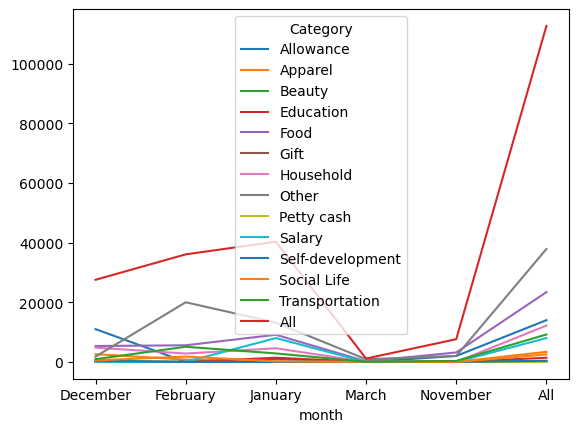

In [19]:
summary.plot()

<Axes: xlabel='month'>

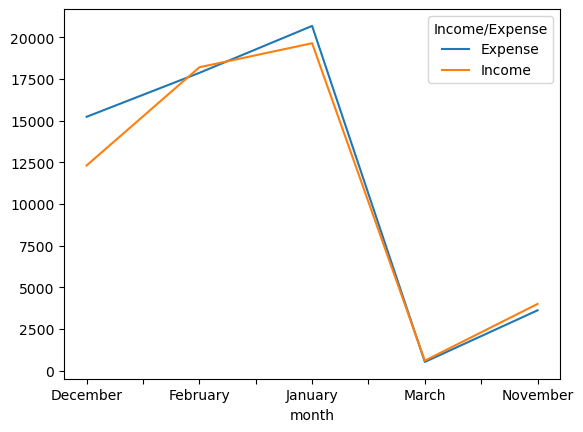

In [20]:
expenses.pivot_table(index = 'month', columns = 'Income/Expense', values = 'Amount', aggfunc = 'sum', fill_value = 0).plot()

In [21]:
# creating a datetime object
pd.Timestamp('2025-07-01')

Timestamp('2025-07-01 00:00:00')

In [22]:
# we can even create multiple ways also
pd.Timestamp('2025/07/01 9:15')

Timestamp('2025-07-01 09:15:00')

In [23]:
# we can even create from datetime object also
import datetime as dt
pd.Timestamp(dt.datetime(2025, 7, 1))

Timestamp('2025-07-01 00:00:00')

In [24]:
# fetching our required data
x = pd.Timestamp('2025-1-23 9:30:10 pm')
x

Timestamp('2025-01-23 21:30:10')

In [25]:
x.year

2025

In [26]:
x.month

1

In [27]:
x.day

23

In [28]:
x.hour

21

In [29]:
x.minute

30

In [30]:
x.second

10

In [31]:
# numpy has datetime64 dtype which makes working with dates easy, faster and less size
x = np.array('2025-01-27', dtype = np.datetime64)
x

array('2025-01-27', dtype='datetime64[D]')

In [32]:
# we can do vectorised operations very easily with this
x + np.arange(12)

array(['2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
       '2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03',
       '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07'],
      dtype='datetime64[D]')

In [33]:
# by grouping these single timestamp objects we can create datetimeindex object
x= pd.DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01'])

In [34]:
type(x)

pandas.core.indexes.datetimes.DatetimeIndex

In [35]:
type(x[0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
# we can make this as an index for series or dataframe objects
pd.Series([1, 2, 3], index = x)

2025-01-01    1
2025-02-01    2
2025-03-01    3
dtype: int64

In [37]:
# date_range function gives us range between two dates
pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = 'D')

DatetimeIndex(['2026-01-01', '2026-01-02', '2026-01-03', '2026-01-04',
               '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-10', '2026-01-11', '2026-01-12',
               '2026-01-13', '2026-01-14', '2026-01-15', '2026-01-16',
               '2026-01-17', '2026-01-18', '2026-01-19', '2026-01-20',
               '2026-01-21', '2026-01-22', '2026-01-23', '2026-01-24',
               '2026-01-25', '2026-01-26', '2026-01-27', '2026-01-28',
               '2026-01-29', '2026-01-30', '2026-01-31'],
              dtype='datetime64[ns]', freq='D')

In [38]:
# Now we can play with these things as per our wish
pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = '2D')

DatetimeIndex(['2026-01-01', '2026-01-03', '2026-01-05', '2026-01-07',
               '2026-01-09', '2026-01-11', '2026-01-13', '2026-01-15',
               '2026-01-17', '2026-01-19', '2026-01-21', '2026-01-23',
               '2026-01-25', '2026-01-27', '2026-01-29', '2026-01-31'],
              dtype='datetime64[ns]', freq='2D')

In [39]:
pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = 'H')

C:\Users\gpava\AppData\Local\Temp\ipykernel_7760\261707134.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = 'H')


DatetimeIndex(['2026-01-01 00:00:00', '2026-01-01 01:00:00',
               '2026-01-01 02:00:00', '2026-01-01 03:00:00',
               '2026-01-01 04:00:00', '2026-01-01 05:00:00',
               '2026-01-01 06:00:00', '2026-01-01 07:00:00',
               '2026-01-01 08:00:00', '2026-01-01 09:00:00',
               ...
               '2026-01-30 15:00:00', '2026-01-30 16:00:00',
               '2026-01-30 17:00:00', '2026-01-30 18:00:00',
               '2026-01-30 19:00:00', '2026-01-30 20:00:00',
               '2026-01-30 21:00:00', '2026-01-30 22:00:00',
               '2026-01-30 23:00:00', '2026-01-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='h')

In [41]:
pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = '18h')

DatetimeIndex(['2026-01-01 00:00:00', '2026-01-01 18:00:00',
               '2026-01-02 12:00:00', '2026-01-03 06:00:00',
               '2026-01-04 00:00:00', '2026-01-04 18:00:00',
               '2026-01-05 12:00:00', '2026-01-06 06:00:00',
               '2026-01-07 00:00:00', '2026-01-07 18:00:00',
               '2026-01-08 12:00:00', '2026-01-09 06:00:00',
               '2026-01-10 00:00:00', '2026-01-10 18:00:00',
               '2026-01-11 12:00:00', '2026-01-12 06:00:00',
               '2026-01-13 00:00:00', '2026-01-13 18:00:00',
               '2026-01-14 12:00:00', '2026-01-15 06:00:00',
               '2026-01-16 00:00:00', '2026-01-16 18:00:00',
               '2026-01-17 12:00:00', '2026-01-18 06:00:00',
               '2026-01-19 00:00:00', '2026-01-19 18:00:00',
               '2026-01-20 12:00:00', '2026-01-21 06:00:00',
               '2026-01-22 00:00:00', '2026-01-22 18:00:00',
               '2026-01-23 12:00:00', '2026-01-24 06:00:00',
               '2026-01-

In [43]:
pd.date_range(start = '2026-01-01', end = '2026-12-31', freq = 'ME')

DatetimeIndex(['2026-01-31', '2026-02-28', '2026-03-31', '2026-04-30',
               '2026-05-31', '2026-06-30', '2026-07-31', '2026-08-31',
               '2026-09-30', '2026-10-31', '2026-11-30', '2026-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [45]:
pd.date_range(start = '2026-01-01', end = '2026-12-31', freq = 'MS')

DatetimeIndex(['2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
               '2026-05-01', '2026-06-01', '2026-07-01', '2026-08-01',
               '2026-09-01', '2026-10-01', '2026-11-01', '2026-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [46]:
pd.date_range(start = '2026-01-01', end = '2030-01-31', freq = 'YE')

DatetimeIndex(['2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [48]:
pd.date_range(start = '2026-01-01', end = '2030-01-31', freq = 'YS')

DatetimeIndex(['2026-01-01', '2027-01-01', '2028-01-01', '2029-01-01',
               '2030-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [50]:
pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = 'B')

DatetimeIndex(['2026-01-01', '2026-01-02', '2026-01-05', '2026-01-06',
               '2026-01-07', '2026-01-08', '2026-01-09', '2026-01-12',
               '2026-01-13', '2026-01-14', '2026-01-15', '2026-01-16',
               '2026-01-19', '2026-01-20', '2026-01-21', '2026-01-22',
               '2026-01-23', '2026-01-26', '2026-01-27', '2026-01-28',
               '2026-01-29', '2026-01-30'],
              dtype='datetime64[ns]', freq='B')

In [51]:
pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = 'W')

DatetimeIndex(['2026-01-04', '2026-01-11', '2026-01-18', '2026-01-25'], dtype='datetime64[ns]', freq='W-SUN')

In [52]:
pd.date_range(start = '2026-01-01', end = '2026-01-31', freq = 'W-MON')

DatetimeIndex(['2026-01-05', '2026-01-12', '2026-01-19', '2026-01-26'], dtype='datetime64[ns]', freq='W-MON')

In [53]:
# below gives that many times data without end date specification
pd.date_range(start = '2026-01-01', periods = 25, freq = 'D')

DatetimeIndex(['2026-01-01', '2026-01-02', '2026-01-03', '2026-01-04',
               '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-10', '2026-01-11', '2026-01-12',
               '2026-01-13', '2026-01-14', '2026-01-15', '2026-01-16',
               '2026-01-17', '2026-01-18', '2026-01-19', '2026-01-20',
               '2026-01-21', '2026-01-22', '2026-01-23', '2026-01-24',
               '2026-01-25'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(start = '2026-01-01', periods = 25, freq = 'ME')

DatetimeIndex(['2026-01-31', '2026-02-28', '2026-03-31', '2026-04-30',
               '2026-05-31', '2026-06-30', '2026-07-31', '2026-08-31',
               '2026-09-30', '2026-10-31', '2026-11-30', '2026-12-31',
               '2027-01-31', '2027-02-28', '2027-03-31', '2027-04-30',
               '2027-05-31', '2027-06-30', '2027-07-31', '2027-08-31',
               '2027-09-30', '2027-10-31', '2027-11-30', '2027-12-31',
               '2028-01-31'],
              dtype='datetime64[ns]', freq='ME')

In [57]:
pd.date_range(start = '2026-01-01', periods = 25, freq = 'MS')

DatetimeIndex(['2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
               '2026-05-01', '2026-06-01', '2026-07-01', '2026-08-01',
               '2026-09-01', '2026-10-01', '2026-11-01', '2026-12-01',
               '2027-01-01', '2027-02-01', '2027-03-01', '2027-04-01',
               '2027-05-01', '2027-06-01', '2027-07-01', '2027-08-01',
               '2027-09-01', '2027-10-01', '2027-11-01', '2027-12-01',
               '2028-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [58]:
# untill above we are generating datetime objects, but in reality we mainly uses them for analyis
# pd.to_datetime is a function which generally converts other data types into datetime objects
ser = pd.Series(['2026-01-01', '2026-01-02', '2026-01-03'])
ser

0    2026-01-01
1    2026-01-02
2    2026-01-03
dtype: object

In [60]:
# if we observe above is string we can convert that like this
pd.to_datetime(ser)

0   2026-01-01
1   2026-01-02
2   2026-01-03
dtype: datetime64[ns]

In [62]:
# now we can do similar datetime functions
pd.to_datetime(ser).dt.year

0    2026
1    2026
2    2026
dtype: int32

In [63]:
pd.to_datetime(ser).dt.day_name()

0    Thursday
1      Friday
2    Saturday
dtype: object

In [64]:
# sometimes we get series like this with invalid dates, and if we tried to convert them directly into dates without any filters it will throw errors
ser = pd.Series(['2026-01-01', '2026-01-02', '2026-012-03'])
pd.to_datetime(ser)

ValueError: time data "2026-012-03" doesn't match format "%Y-%m-%d", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [65]:
# so aviod this we can add below
pd.to_datetime(ser, errors = 'coerce')

0   2026-01-01
1   2026-01-02
2          NaT
dtype: datetime64[ns]

In [67]:
df = pd.read_csv('expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [69]:
# we can see above date column is string, so we are converting this into datettime object
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [70]:
df['Date'].dt.month

0       3
1       3
2       3
3       3
4       3
       ..
272    11
273    11
274    11
275    11
276    11
Name: Date, Length: 277, dtype: int32

In [72]:
df['Date'].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [73]:
# let's say i want to find which day he spends more
df['day_name'] = df['Date'].dt.day_name()
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday


<Axes: xlabel='day_name'>

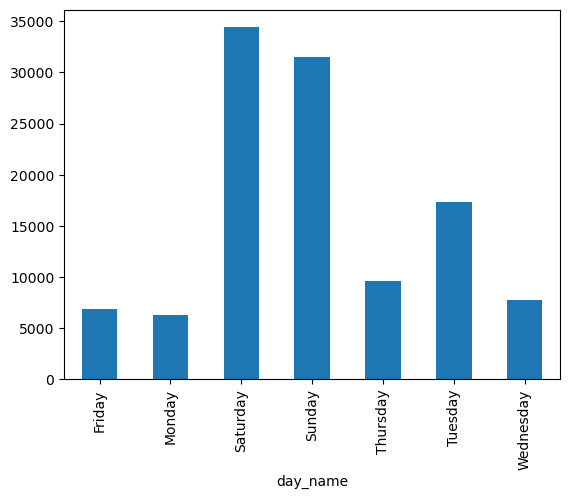

In [75]:
df.groupby('day_name')['INR'].sum().plot(kind = 'bar')

In [76]:
# want to find which month he spends a lot
df['mont_name'] = df['Date'].dt.month_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,mont_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='mont_name'>

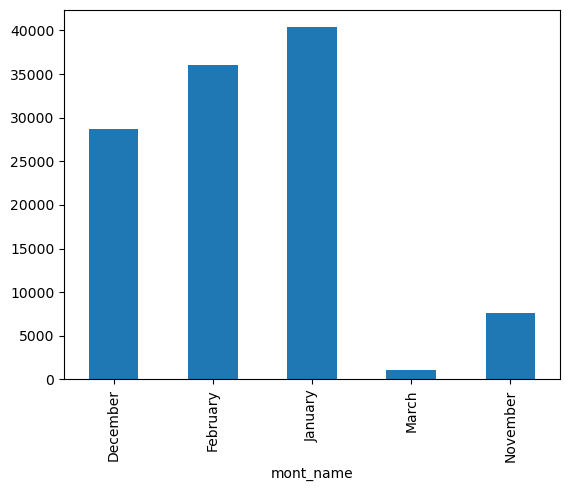

In [77]:
df.groupby('mont_name')['INR'].sum().plot(kind = 'bar')